In [1]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
goog = df[df['Name'] == 'GOOG'][['Close']].copy()
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


In [2]:
goog.columns = ['y']
goog['ds'] = goog.index

15:50:26 - cmdstanpy - INFO - Chain [1] start processing
15:50:26 - cmdstanpy - INFO - Chain [1] done processing


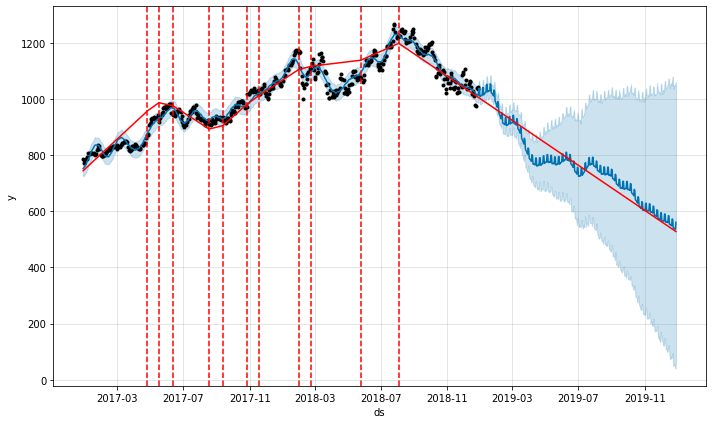

In [3]:
m = Prophet()
m.fit(goog.iloc[-252*2:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

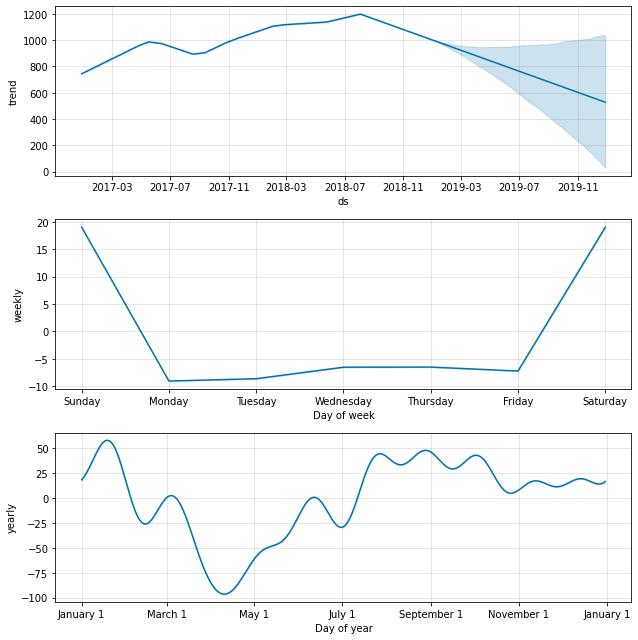

In [4]:
m.plot_components(forecast);

15:52:24 - cmdstanpy - INFO - Chain [1] start processing
15:52:24 - cmdstanpy - INFO - Chain [1] done processing


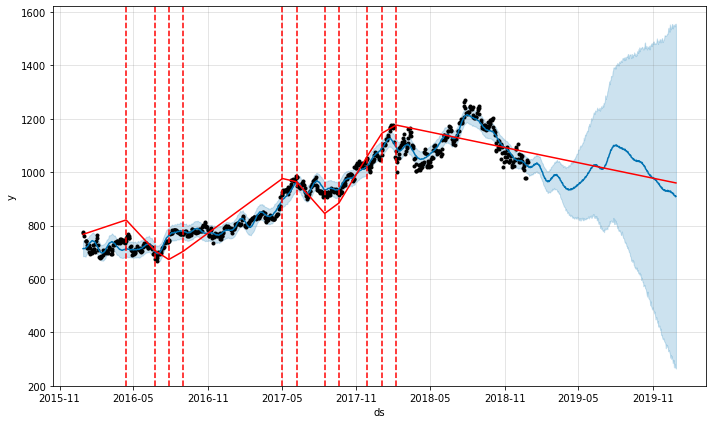

In [5]:
# BAD!!! From blog articles
m = Prophet(daily_seasonality=True)
m.fit(goog.iloc[-252*3:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

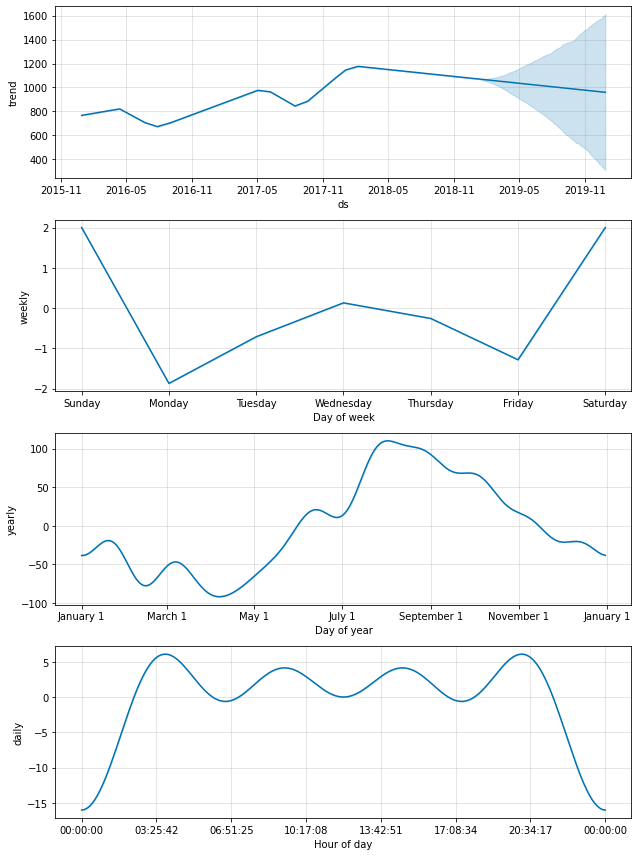

In [6]:
m.plot_components(forecast);

15:52:51 - cmdstanpy - INFO - Chain [1] start processing
15:52:52 - cmdstanpy - INFO - Chain [1] done processing


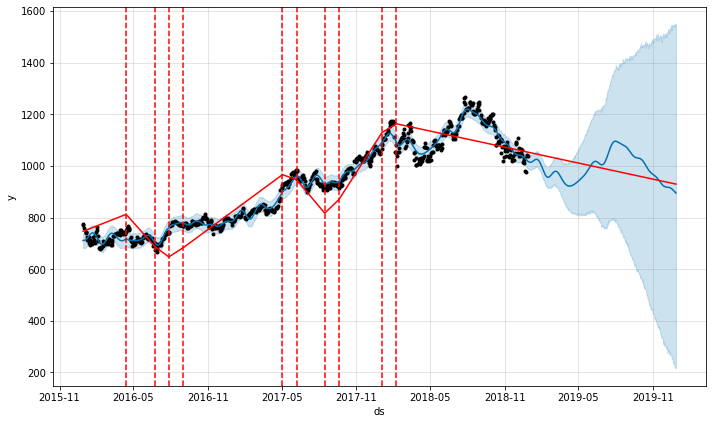

In [7]:
m = Prophet(weekly_seasonality=False)
m.fit(goog.iloc[-252*3:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

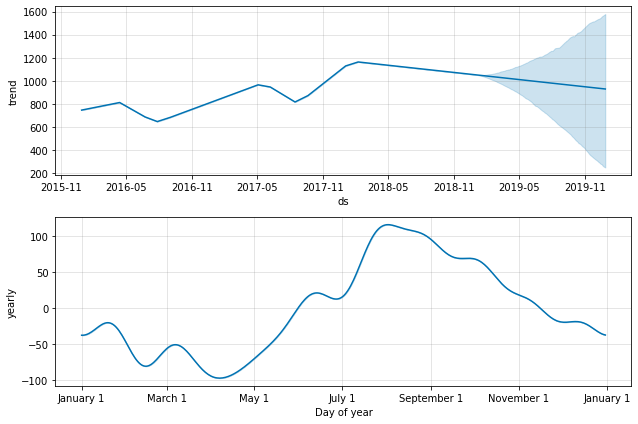

In [8]:
m.plot_components(forecast);

In [9]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
m = Prophet(weekly_seasonality=False)
m.fit(goog[-252*2:])
# try period=15, horizon=30
# try period=30, horizon=60
df_cv = cross_validation(
    m,
    initial='365 days',
    period='5 days',
    horizon='5 days')
df_cv.head(20)

15:53:28 - cmdstanpy - INFO - Chain [1] start processing
15:53:28 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/73 [00:00<?, ?it/s]

15:53:28 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1]

15:53:38 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-12-29,1065.747980,1051.712226,1079.886705,1046.400024,2017-12-28
1,2018-01-02,1069.768989,1056.228667,1083.916139,1065.000000,2017-12-28
2,2018-01-03,1065.833208,1051.973608,1080.248730,1082.479980,2018-01-02
3,2018-01-04,1066.915458,1052.579835,1080.178136,1086.400024,2018-01-02
4,2018-01-05,1068.098171,1054.447658,1082.642454,1102.229980,2018-01-02
5,2018-01-08,1086.146577,1071.446177,1099.099030,1106.939941,2018-01-07
6,2018-01-09,1087.954552,1073.216653,1101.849645,1106.260010,2018-01-07
7,2018-01-10,1089.733159,1075.943985,1104.040052,1102.609985,2018-01-07
8,2018-01-11,1091.462915,1076.756547,1104.903456,1105.520020,2018-01-07
9,2018-01-12,1093.123772,1079.249664,1107.644181,1122.260010,2018-01-07


In [10]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()
naive_storage = np.zeros(naive.shape[0])
one_day = pd.Timedelta(1, 'day')
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff = cutoff - one_day

  naive_storage[i] = goog.loc[cutoff]['y']

naive['yhat'] = naive_storage
pm = performance_metrics(df_cv)
pm['smape'].mean()

0.03130832655839347

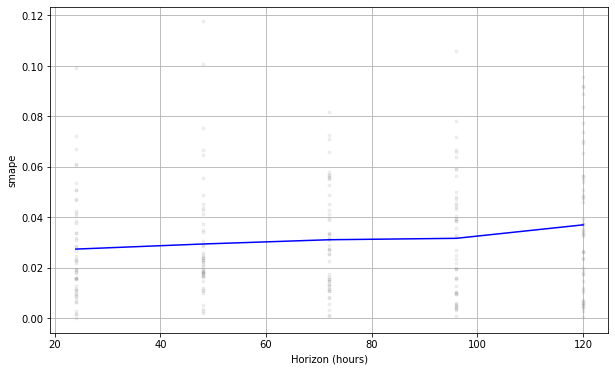

In [11]:
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()
plot_cross_validation_metric(df_cv, metric='smape');

In [12]:
log_goog = goog.copy()
log_goog['y'] = np.log(goog['y'])
m = Prophet(weekly_seasonality=False)
m.fit(log_goog[-252*2:])
df_cv = cross_validation(
    m,
    initial='365 days',
    period='30 days',
    horizon='60 days')
pm = performance_metrics(df_cv)
pm['smape'].mean()

15:54:51 - cmdstanpy - INFO - Chain [1] start processing
15:54:51 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/11 [00:00<?, ?it/s]

15:54:51 - cmdstanpy - INFO - Chain [1] start processing
15:54:51 - cmdstanpy - INFO - Chain [1] done processing
15:54:51 - cmdstanpy - INFO - Chain [1] start processing
15:54:51 - cmdstanpy - INFO - Chain [1] done processing
15:54:51 - cmdstanpy - INFO - Chain [1] start processing
15:54:51 - cmdstanpy - INFO - Chain [1] done processing
15:54:52 - cmdstanpy - INFO - Chain [1] start processing
15:54:52 - cmdstanpy - INFO - Chain [1] done processing
15:54:52 - cmdstanpy - INFO - Chain [1] start processing
15:54:52 - cmdstanpy - INFO - Chain [1] done processing
15:54:52 - cmdstanpy - INFO - Chain [1] start processing
15:54:52 - cmdstanpy - INFO - Chain [1] done processing
15:54:52 - cmdstanpy - INFO - Chain [1] start processing
15:54:52 - cmdstanpy - INFO - Chain [1] done processing
15:54:52 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing
15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1]

0.014420514803284303

In [13]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()
naive_storage = np.zeros(naive.shape[0])
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff = cutoff - pd.Timedelta(1, 'day')

  naive_storage[i] = log_goog.loc[cutoff]['y']

naive['yhat'] = naive_storage
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.008361150811971313

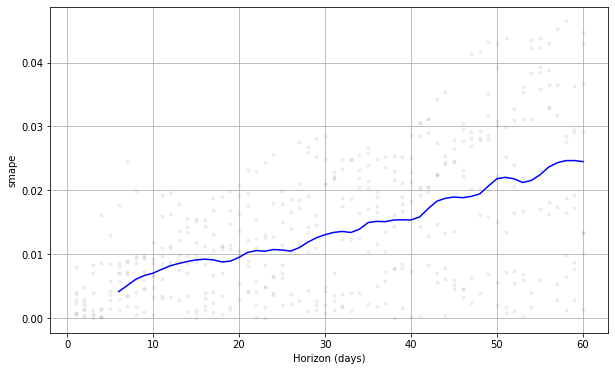

In [14]:

plot_cross_validation_metric(df_cv, metric='smape');